In [240]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [241]:
df = pd.read_excel('adult.xlsx')
data = df.copy()

In [242]:
# Define column names
column_names = ['age', 'workclass', 'final-weight', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

# Set column names for the DataFrame
data.columns = column_names

#EDA

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   final-weight    32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [244]:
data.describe()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [245]:
def get_unique(col):
  print('Unique values of ',col.name)
  print(col.unique())
  print('\n')
cols=['workclass', 'education', 'marital-status',
      'occupation', 'relationship', 'race', 'sex',
      'native-country', 'income']

data[cols].apply(get_unique)

Unique values of  workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Unique values of  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Unique values of  marital-status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique values of  occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']


Unique values of  relationship
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Unique values of  race
[' White' ' Black' ' Asian-Pac-Islander'

workclass         None
education         None
marital-status    None
occupation        None
relationship      None
race              None
sex               None
native-country    None
income            None
dtype: object

In [246]:
# Use regex=True to enable regular expressions
data['native-country'].replace(r'\?', np.nan, regex=True, inplace=True)
data['workclass'].replace(r'\?', np.nan, regex=True, inplace=True)
data['occupation'].replace(r'\?', np.nan, regex=True, inplace=True)


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   final-weight    32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [248]:
# Calculate mode for 'native-country', 'workclass', and 'occupation'
native_country_mode = data['native-country'].mode()[0]
workclass_mode = data['workclass'].mode()[0]
occupation_mode = data['occupation'].mode()[0]
print(native_country_mode,workclass_mode,occupation_mode)

# Replace missing values with mode
data['native-country'].fillna(native_country_mode, inplace=True)
data['workclass'].fillna(workclass_mode, inplace=True)
data['occupation'].fillna(occupation_mode, inplace=True)

 United-States  Private  Prof-specialty


In [249]:
column_name_map = {'age': "Age", 'final-weight': 'Final Weight',
                  'education_num': "Number of Years of Education",
                  'hours_per_week': "Hours Worked Per Week",
                  'workclass': 'Working Class',
                  'education': "Education Level",
                  'marital-status': "Marital Status",
                  'occupation': "Occupation",
                  'relationship': "Relationship",
                  'race': 'Race',
                  'sex': "Sex",
                  'native-country': "Native Country",
                  'income': "Income"}

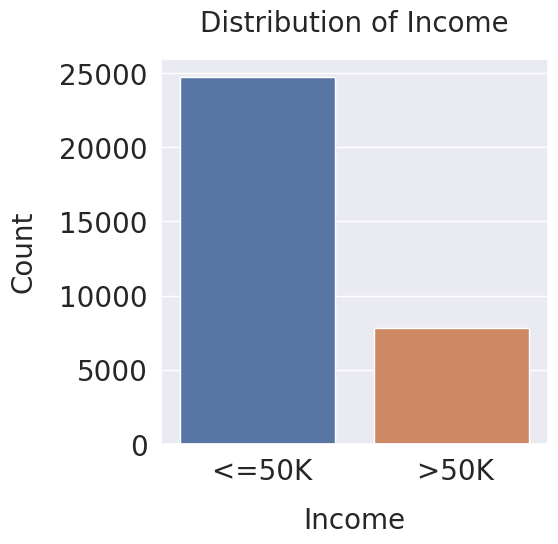

In [250]:
f=20
plt.figure(figsize=(5, 5))
sns.countplot(x='income', data=data)
plt.title(f'Distribution of '+ column_name_map['income'],y = 1.05,fontsize =f)
plt.xlabel(column_name_map['income'],labelpad = 15,fontsize =f)
plt.xticks(rotation = 0, size = f)
plt.yticks(size = f)
plt.ylabel('Count',labelpad = 15,fontsize = f)
plt.show()

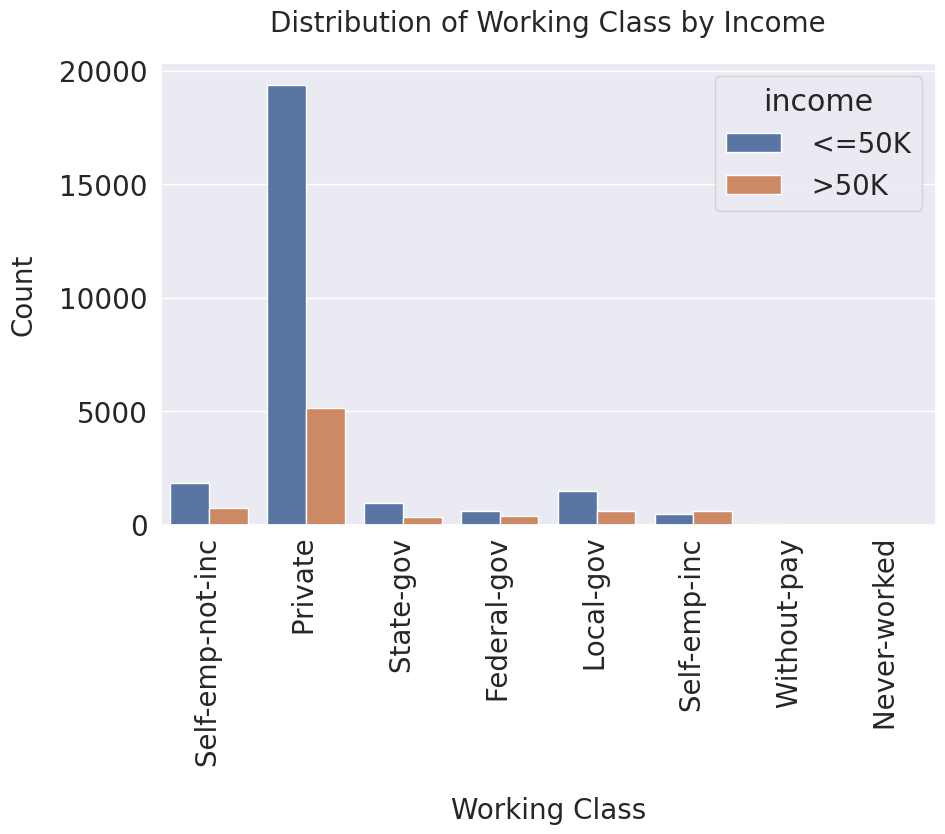

In [251]:
# Plotting 'Working Class'
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["workclass"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['workclass'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

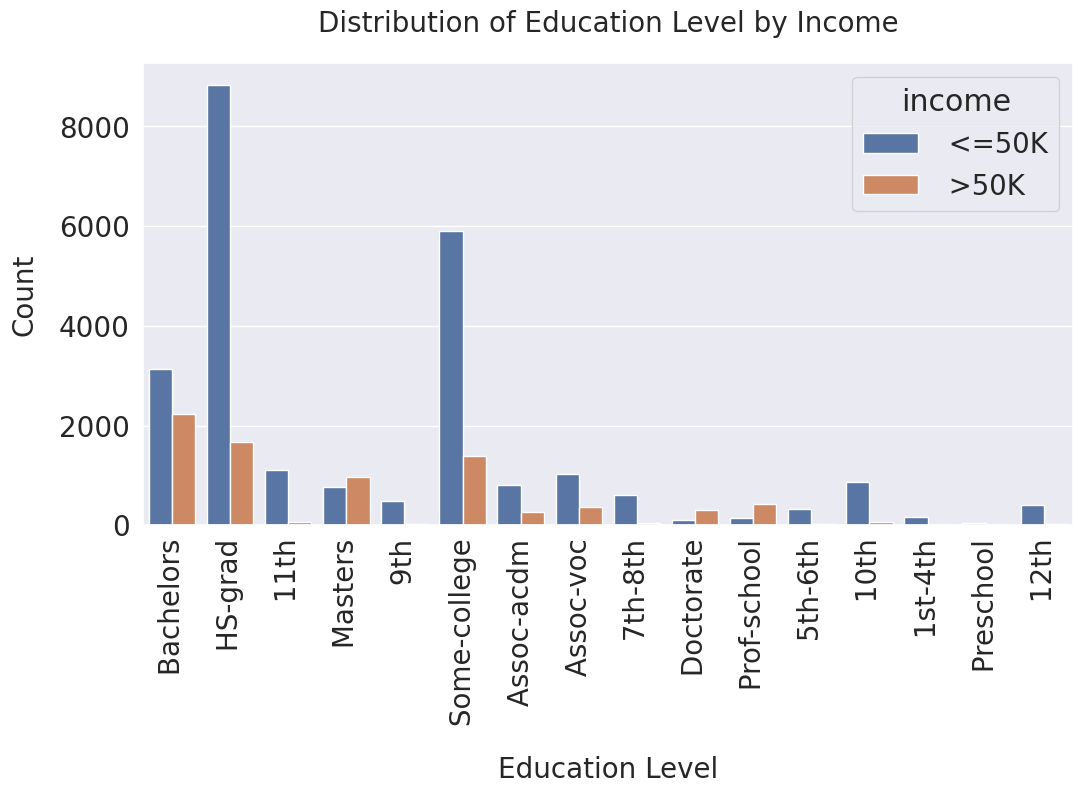

In [252]:
# Plotting 'Education Level'
plt.figure(figsize=(12, 6))
sns.countplot(x='education',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["education"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['education'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

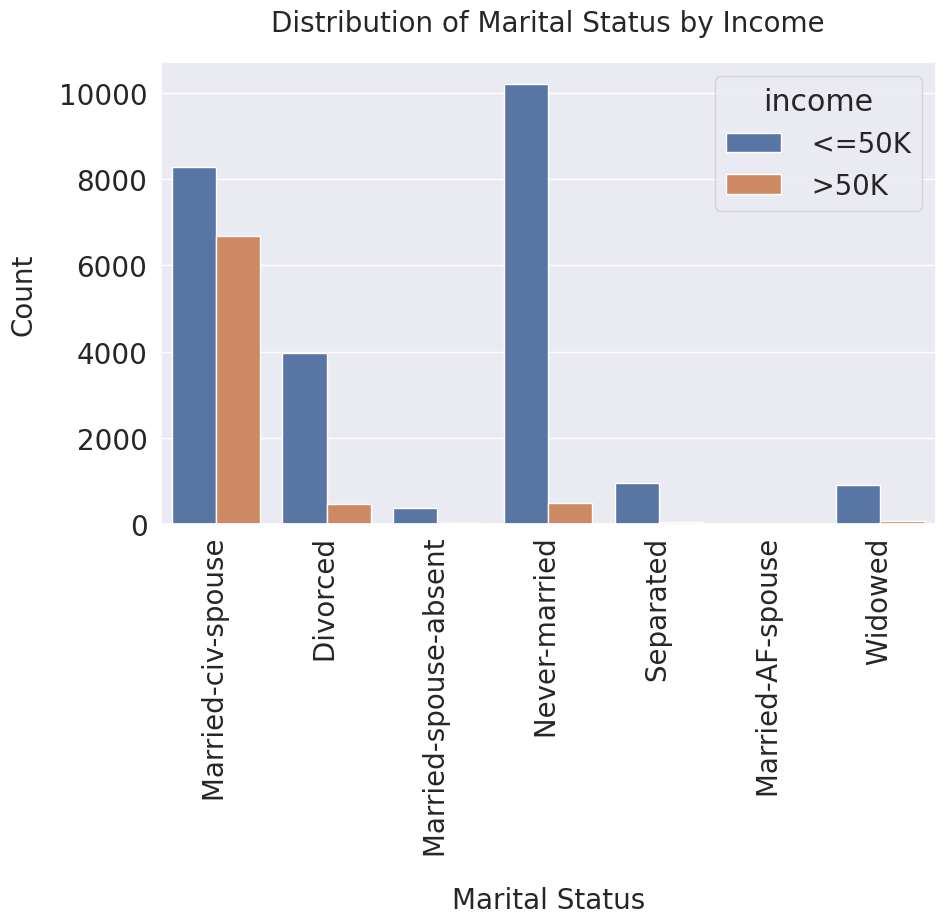

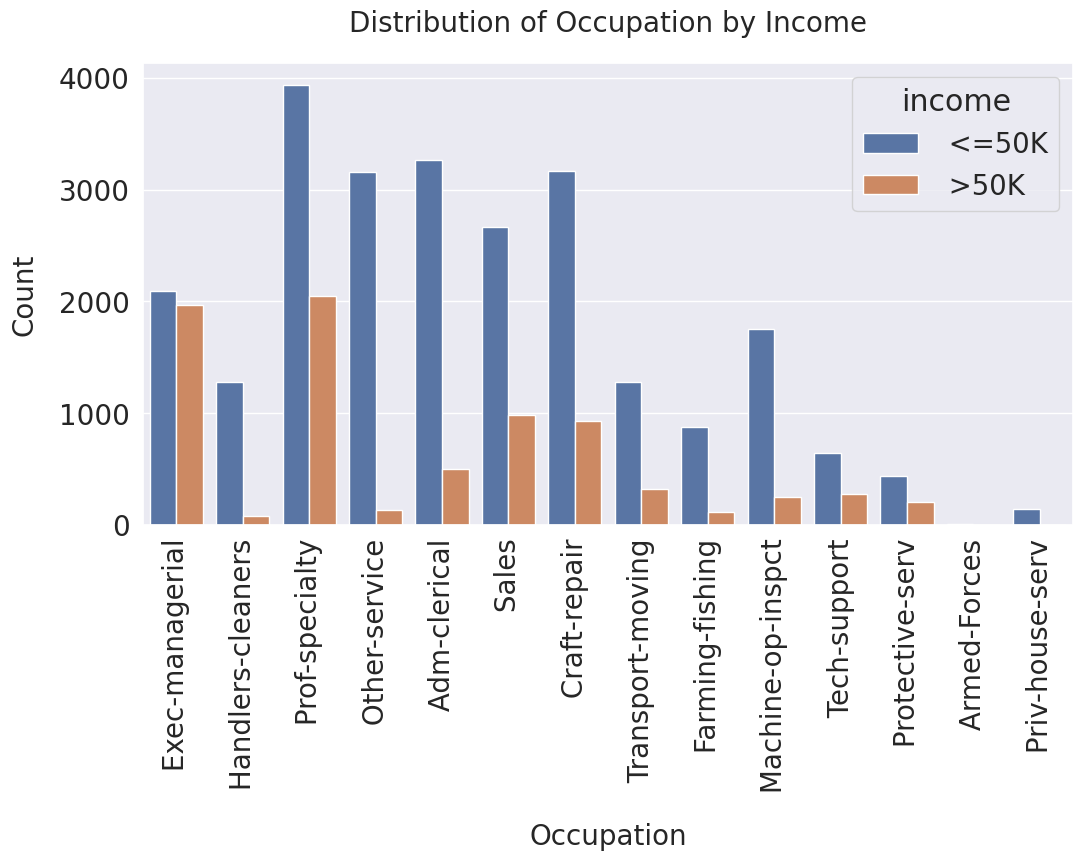

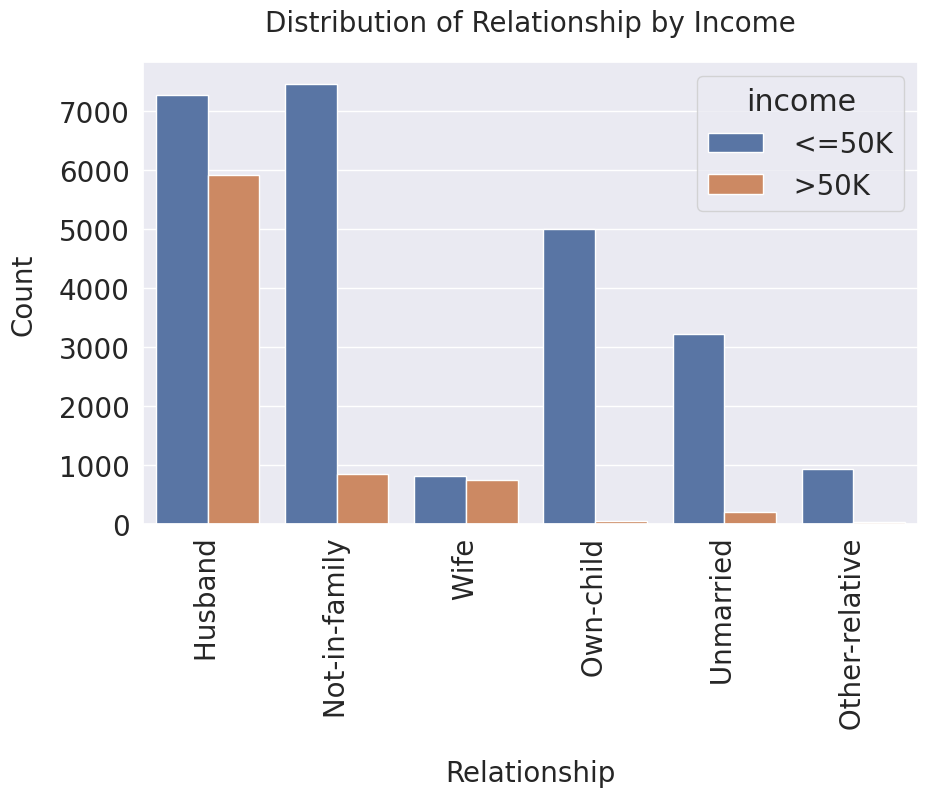

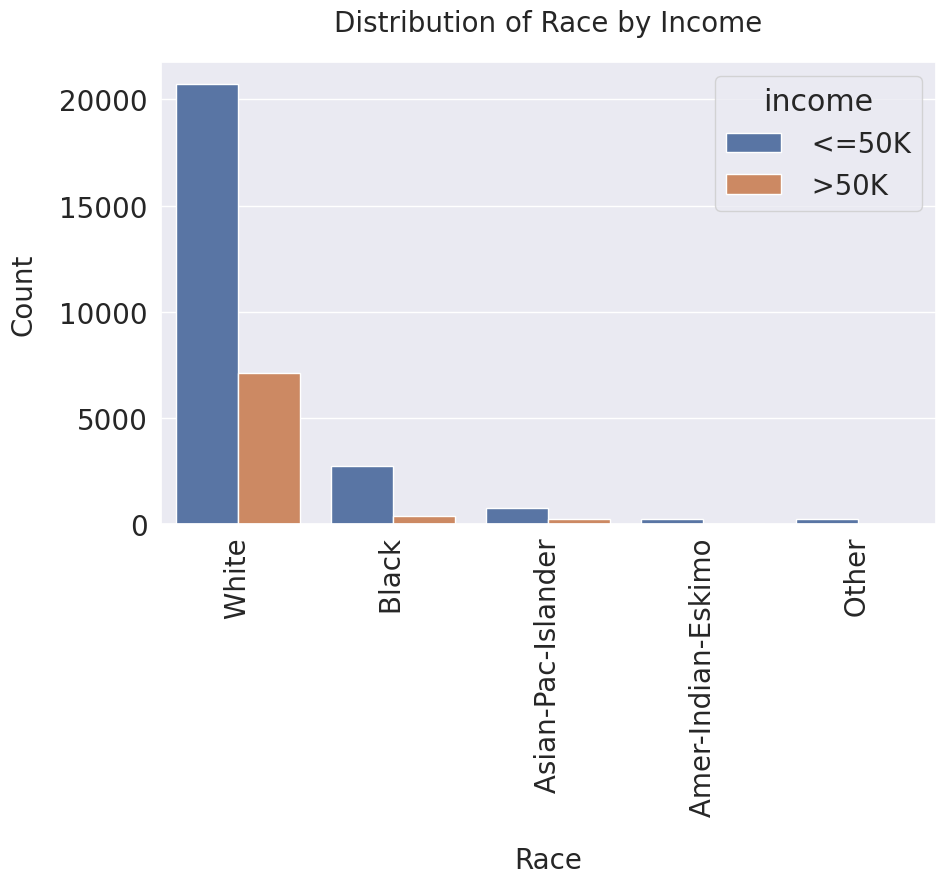

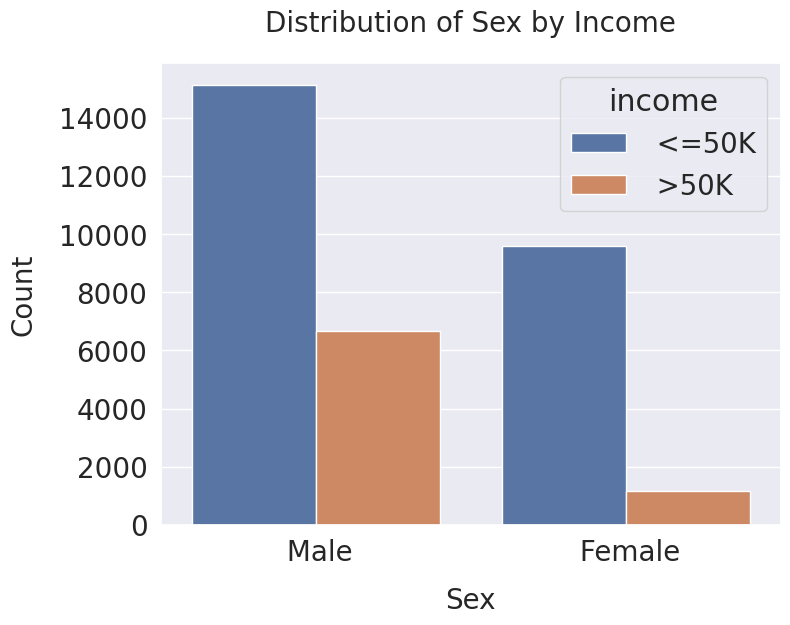

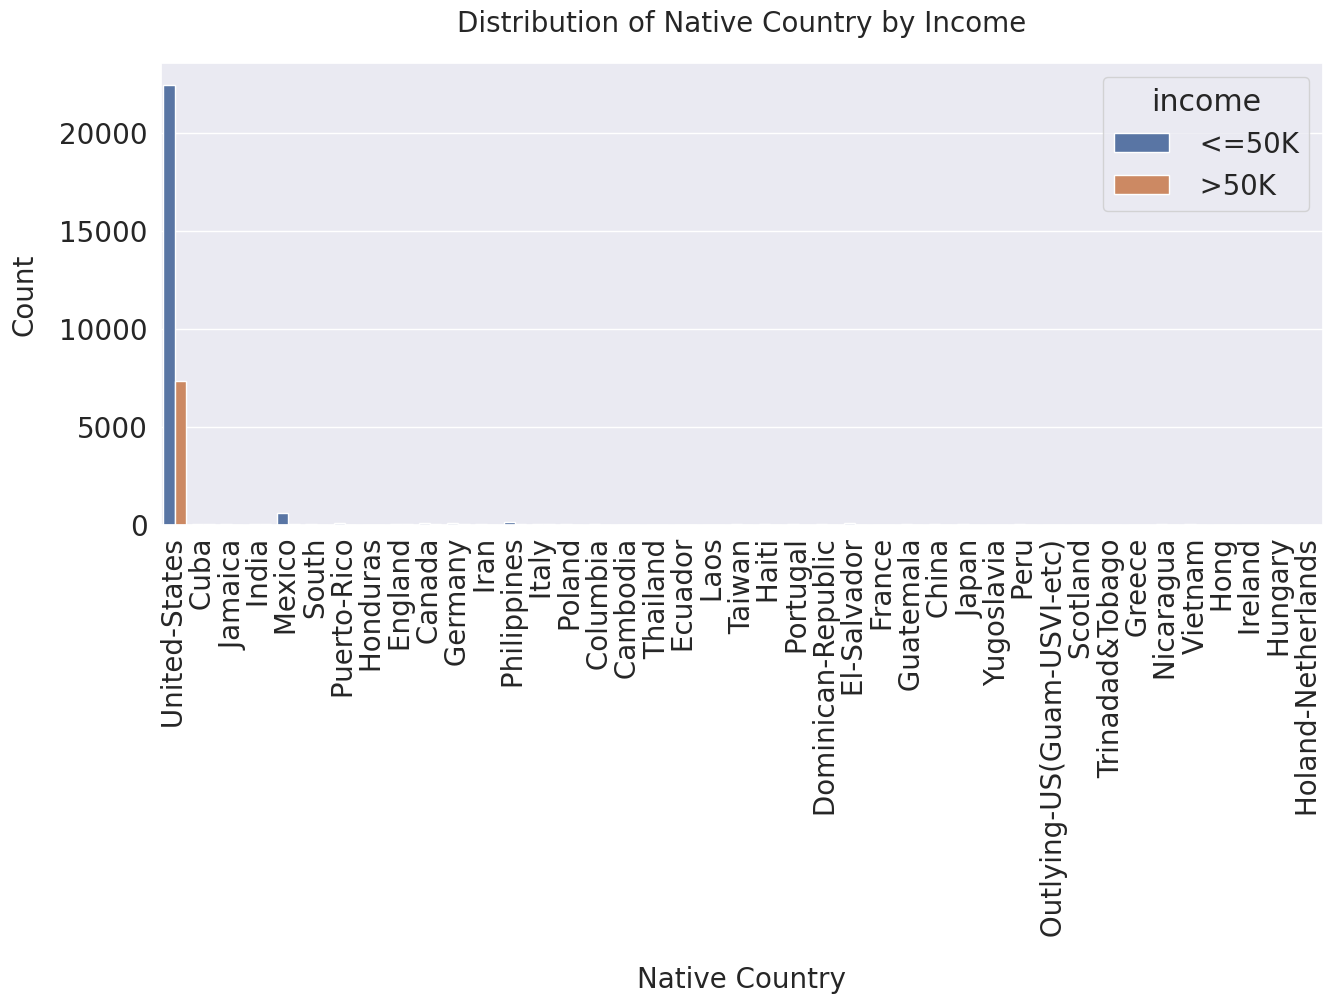

In [253]:
# Plotting 'Marital Status'
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["marital-status"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['marital-status'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

# Plotting 'Occupation'
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["occupation"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['occupation'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

# Plotting 'Relationship'
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["relationship"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['relationship'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

# Plotting 'Race'
plt.figure(figsize=(10, 6))
sns.countplot(x='race',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["race"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['race'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

# Plotting 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["sex"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['sex'], labelpad=15, fontsize=f)
plt.xticks(rotation=0, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

# Plotting 'Native Country'
plt.figure(figsize=(15, 6))
sns.countplot(x='native-country',hue='income',data=data)
plt.title(f'Distribution of {column_name_map["native-country"]} by Income', y=1.05, fontsize=f)
plt.xlabel(column_name_map['native-country'], labelpad=15, fontsize=f)
plt.xticks(rotation=90, size=f)
plt.yticks(size=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.show()

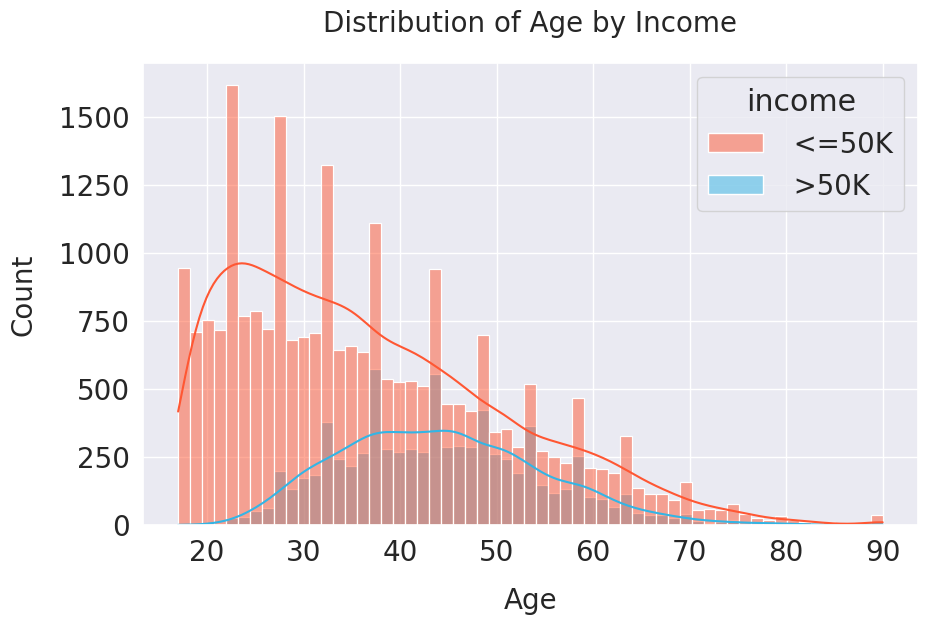

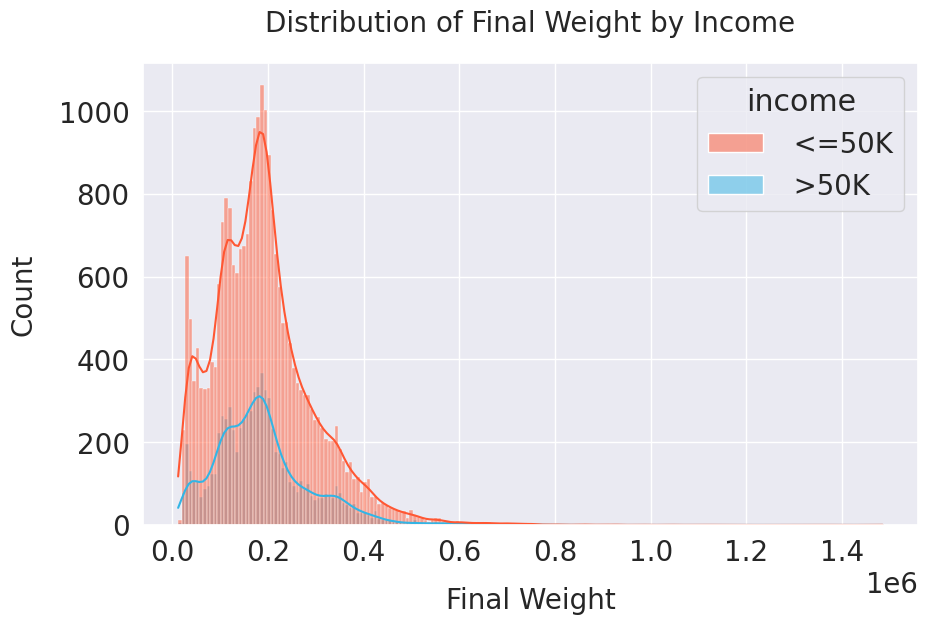

In [220]:
# Plot 'Age'
custom_palette = ["#FF5733", "#33B5E5"]
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='income', kde=True, palette=custom_palette)
plt.title(f'Distribution of {column_name_map["age"]} by Income',y=1.05, fontsize=f)
plt.xlabel(column_name_map['age'], labelpad=15, fontsize=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.xticks(size=f)
plt.yticks(size=f)
plt.show()

# Plot 'Final Weight'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='final-weight', hue='income', kde=True, palette=custom_palette)
plt.title(f'Distribution of {column_name_map["final-weight"]} by Income',y=1.05,fontsize=f)
plt.xlabel(column_name_map['final-weight'], labelpad=15, fontsize=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.xticks(size=f)
plt.yticks(size=f)
plt.show()

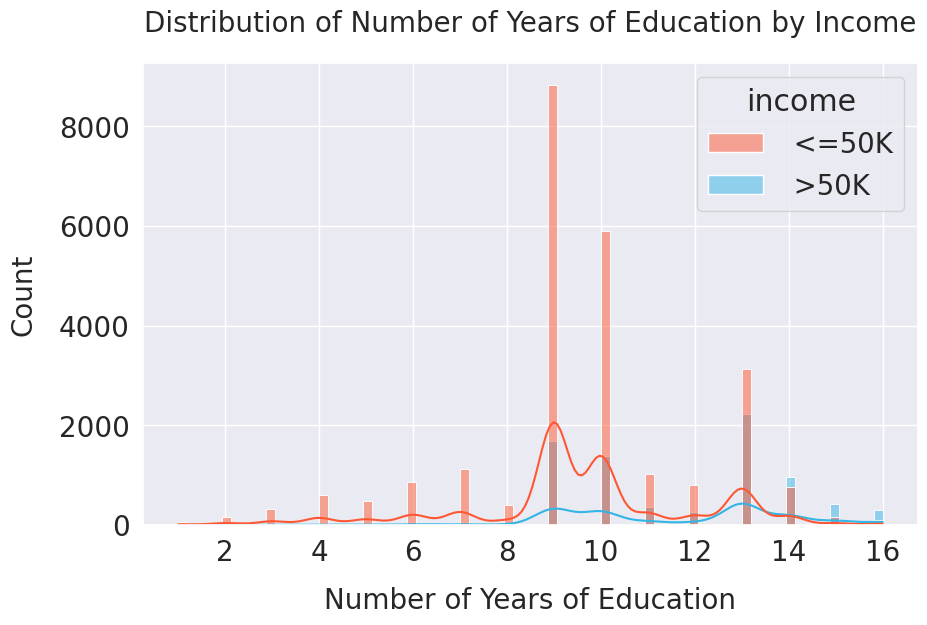

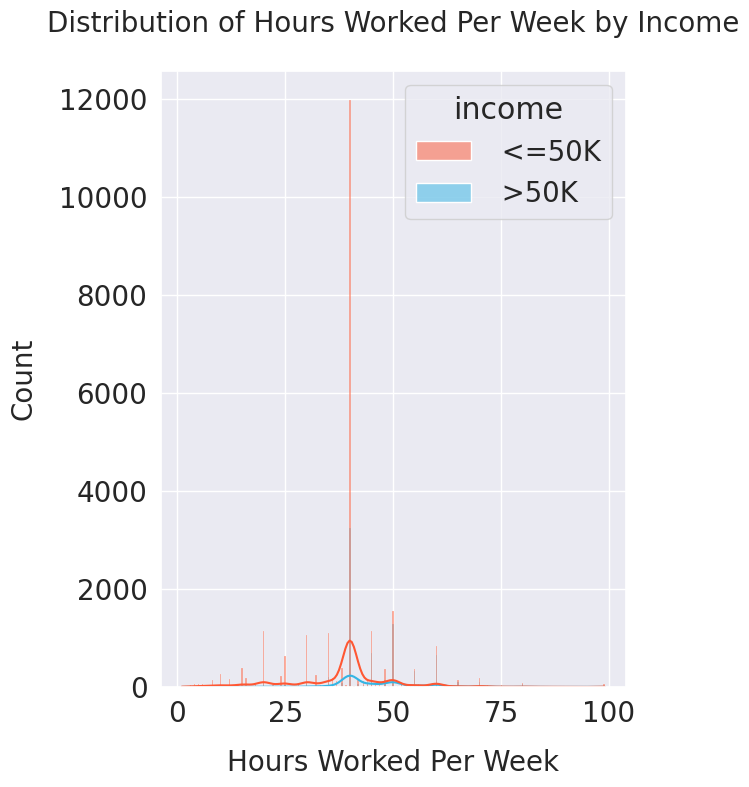

In [230]:
# Plot 'Number of Years of Education'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='education-num', hue='income', kde=True, palette=custom_palette)
plt.title(f'Distribution of {column_name_map["education_num"]} by Income',y=1.05, fontsize=f)
plt.xlabel(column_name_map['education_num'], labelpad=15, fontsize=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.xticks(size=f)
plt.yticks(size=f)
plt.show()

# Plot 'Hours Worked Per Week'
plt.figure(figsize=(6, 8))
sns.histplot(data=data, x='hours-per-week', hue='income', kde=True, palette=custom_palette)
plt.title(f'Distribution of {column_name_map["hours_per_week"]} by Income', y=1.05,fontsize=20)
plt.xlabel(column_name_map['hours_per_week'], labelpad=15,fontsize=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.xticks(size=f)
plt.yticks(size=f)
plt.show()


#Feature engineering

In [231]:
# Encode categorical variables
label_encoder = LabelEncoder()

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                     'relationship', 'race', 'sex', 'native-country', 'income']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


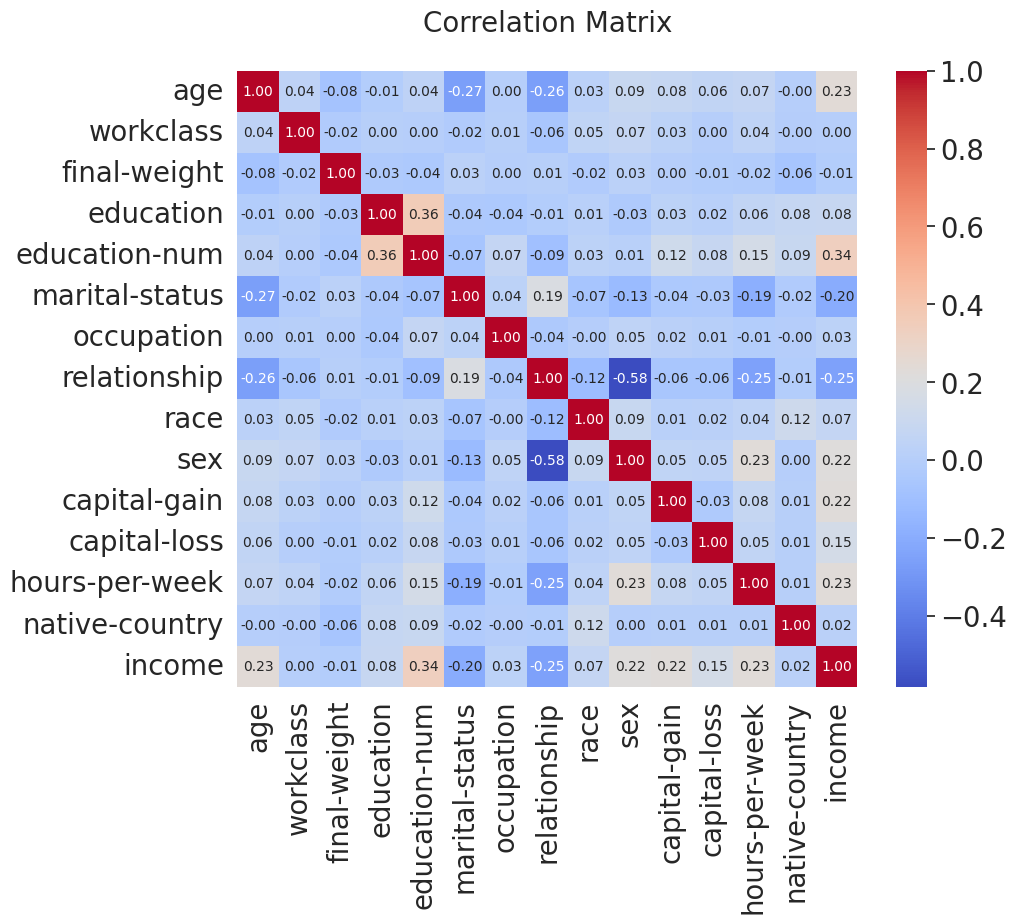

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with smaller font size for annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Add a title
plt.title("Correlation Matrix", fontsize=20,y=1.05)

# Show the plot
plt.show()


In [81]:
# Define features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_model.predict(X_test)


In [82]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7963759213759214
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4912
           1       0.68      0.32      0.44      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.64      0.66      6512
weighted avg       0.78      0.80      0.77      6512

